# Default Prediction Using Classification Models

**Author: Rahul Kulkarni**


**Scope and Problem Statement:** I have built this kernel to explain various classification models and metrics which can be used to evaluate models. I will go through various aspects of machine learning such as data wrangling, exploratory data analysis, model selection, parameter tuning and resampling. We will aim to predict the probablity of deafaulting in the next month using various data related to the customers.

This kind of task is very useful in risk management. Since banks make most of their revenues thorugh credit card bills of their customers, it's very important to have a good prediction otherwise defaulting causes huge losses to the banks.

**Description of the dataset:**

There are 25 variables:

1. ID: ID of each client
1. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
1. SEX: Gender (1=male, 2=female)
1. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
1. MARRIAGE: Marital status (1=married, 2=single, 3=others)
1. AGE: Age in years
1. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
1. PAY_2: Repayment status in August, 2005 (scale same as above)
1. PAY_3: Repayment status in July, 2005 (scale same as above)
1. PAY_4: Repayment status in June, 2005 (scale same as above)
1. PAY_5: Repayment status in May, 2005 (scale same as above)
1. PAY_6: Repayment status in April, 2005 (scale same as above)
1. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
1. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
1. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
1. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
1. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
1. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
1. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
1. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
1. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
1. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
1. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
1. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
1. default.payment.next.month: Default payment (1=yes, 0=no)

**Flow of process:**
With this kernel, I will try to explain the basic steps which I took for various tasks mentioned below. Since this is clearly a classification problem, I will fit various models on the data and try to find the best one.

* Data Wrangling:
Handling missing values and collecting information about various variables.
* Exploratory Data Analysis:
Finding a correlation between various variables through plots.
* Modelling:
Fitting various models on the train data. Also, we will check the parameters which give us the optimum results for particular models. For example: Varying 'K' in KNearest Neighbors model, Maximum depth in Decision Tree Classifier etc. We will also evaluate the models by predicting the result using test data. Predominantly, we will make use of confusion matrix and f1 scores.
* Resampling:
During EDA we will get to know if the dataset is imbalanced or not, depending on that we will visit this technique.
* Re-Modelling:
We will again fit the models on the resampled data and check if any better results are obtained.

# Data Wrangling

Data wrangling refers to the process of obtaining, cleaning, restructuring and enriching the raw data available into a more usable format. This will help us quicken the process of decision making, and thus get better insights in less time. Certain objectives of this step will be handle missing values, check datatypes of our variables etc.

**Importing Libraries**
These will be used to read data, plotting and transformation of data.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
import pandas as pd
loan = pd.read_csv('../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')
loan.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [131]:
loan.shape

(30000, 25)

In [132]:
loan.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

Checking the amount of missing data we have.

In [133]:
loan.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Looks like we have got ourselves a perfect dataset(I hope), but we have completed one important task from our checklist.
Now let's check the datatypes of the variables to verify that we don't have any other surprises at hand.

In [134]:
loan.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

All of the data types seem to be correct.

# Exploratory Data Analysis

In this section, we will attempt to build relations between various attributes of the customer, make sense out of the data and answer questions like How these variables affect the probability of a customer defaulting in the next month? At first, we can't even imagine how variables like Age, Sex etc. affect the chance of defaulting. But this is what EDA is all about, finding intricate details we can't see through our eyes at the first glance. I believe, the more surprises EDA provides us, the better it is!! 

Let's look at the various statistical attributes of each variable.

In [135]:
loan.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The first thing that I observed was the huge range of 'LIMIT_BAL'. The reason why I am worried about this is that this might cause us problems while modelling and create a bias towards this variable. Secondly, I have observed certain values which are not mentioned in the data description like '0' in 'MARRIAGE' and '-2' and '-1' in the 'PAY_' variables. Thirdly, there are negative values in 'BILL_AMT' variables, which may mean the bank provides a credit system for bill payment. But we will deal with all of these problems afterwards while preparing the data for the splitting. 

Let's check the correlations between the variables.

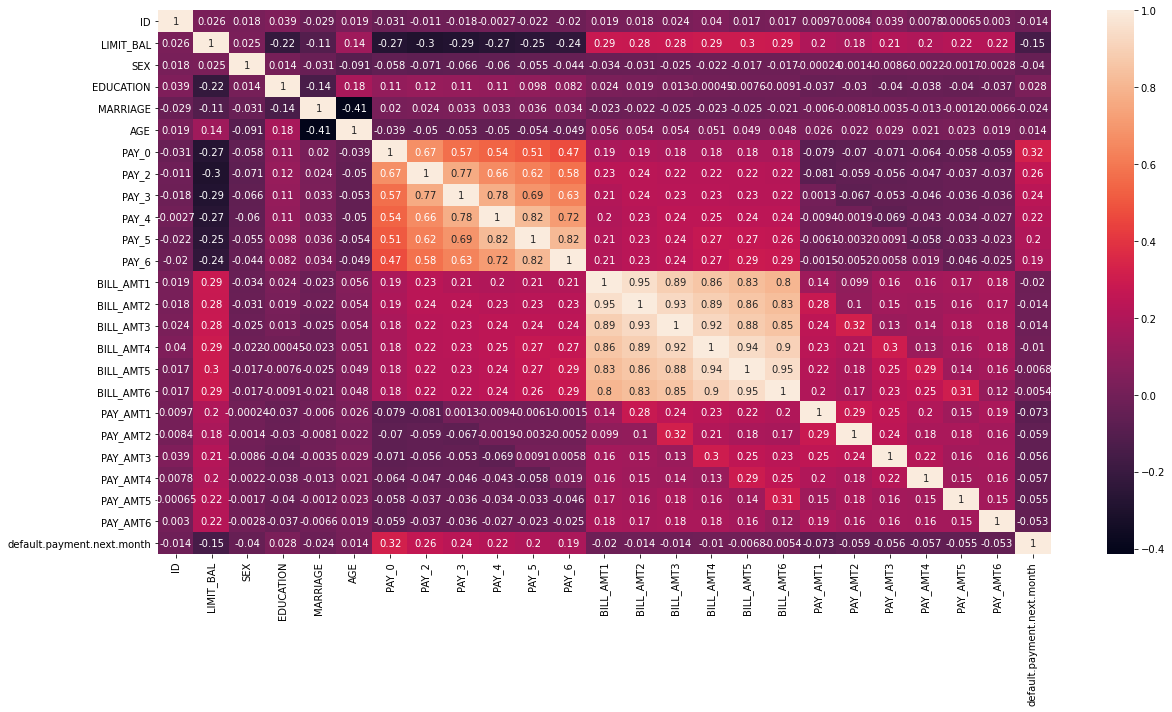

In [136]:
corr = loan.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()
corr = np.array(corr)

Here we go, the first surprise. None of the variables have a strong correlation with the defaulting chance of the customer. Does this mean this problem is not solvable? Obviously NO! We aren't going to quit until we solve this. 

Ok, so let's calm down now and take a look at things that might make sense to us. The 'PAY_' variables have a small amount of positive correlation with the target variable and a stronger correlation amongst themselves. Well, if you have or haven't defaulted in the previous months could decide the probability of defaulting in the next month. 

Secondly, 'BILL_AMT' variables have a strong positive correlation amongst themselves. This also makes sense as spending patterns of customers tend to remain constant and, E-commerce organizations take advantage of this, but that's a different matter and something to research about but later.

As expected, 'LIMIT_BAL' has a positive correlation with 'BILL_AMT' and a negative correlation with 'PAY_' variables. 

The strongest negative correlation is between 'AGE' and 'MARRIAGE' which, is expected as younger customers tend to be single and older ones tend to be married.

Since we saw some unexpected values in certain columns, let's take a closer look at them.

In [137]:
sex = loan['SEX'].value_counts()
ed = loan['EDUCATION'].value_counts()
mg = loan['MARRIAGE'].value_counts()
age = loan['AGE'].value_counts()
print(sex)
print('----------')
print(ed)
print('----------')
print(mg)
print('----------')
print(age)

2    18112
1    11888
Name: SEX, dtype: int64
----------
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
----------
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
----------
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64


'EDUCATION' variable has an unexplained value of '0' and another thing that bothers me are the values '4','5' and '6'. The description has very ambiguous descriptions for '5' and '6' as they both have 'Unknown' value. 'MARRIAGE' variable has another ambiguous value of '0'. The value '0' in 'EDUCATION' might mean high school dropout and '0' and '3' in 'MARRIAGE' might mean divorced, but we aren't here to assign descriptions. We can club together the ambiguous values since they don't make much sense to us. 

This allows us to use the loc method on the DataFrame.

In [138]:
loan.loc[loan['EDUCATION']==5,'EDUCATION']=4     
loan.loc[loan['EDUCATION']==6,'EDUCATION']=4
loan.loc[loan['EDUCATION']==0,'EDUCATION']=4
loan.loc[loan['MARRIAGE']==0,'MARRIAGE']=3
print(loan['EDUCATION'].value_counts())
print('---------')
print(loan['MARRIAGE'].value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
---------
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


Since we cleaned certain variables, so let's check how they correlate to our target variable and hope for an improvement.

In [139]:
new_corr = loan[['EDUCATION','MARRIAGE','default.payment.next.month']].corr()
nc = np.array(new_corr)
nc = nc[2,0:2]
oc = corr[24,3:5]
diff = nc-oc
print('Improvements in correlation:',diff)
loan[['EDUCATION','MARRIAGE','default.payment.next.month']].corr()

Improvements in correlation: [ 0.00583615 -0.00323549]


,EDUCATION,MARRIAGE,default.payment.next.month
EDUCATION,1.000000,-0.136797,0.033842
MARRIAGE,-0.136797,1.000000,-0.027575
default.payment.next.month,0.033842,-0.027575,1.000000


The correlation factors increased for 'AGE' by ~ 0.00584 and decreased for 'MARRIAGE' by ~ 0.00323. Amazing! That's an improvement, a minute one but as Neil Armstrong said 'This is one small step for a man, one giant leap for mankind.' 

Ok I agree, that was a bit extreme, I guess that's what happens when you try to be creative on your kernel at 3 AM. But that's our aim, improve at every step and learn something new.

Let's look at the 'PAY_' variables.

In [140]:
p0 = loan['PAY_0'].value_counts()
p2 = loan['PAY_2'].value_counts()
p3 = loan['PAY_3'].value_counts()
p4 = loan['PAY_4'].value_counts()
p5 = loan['PAY_5'].value_counts()
p6 = loan['PAY_6'].value_counts()
print(p0)
print('----------')
print(p2)
print('----------')
print(p3)
print('----------')
print(p4)
print('----------')
print(p5)
print('----------')
print(p6)

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
----------
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
----------
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
----------
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
----------
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
----------
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


The data description mentions '-1' value for the 'PAY_' variables as duly paid but there values such as '0' and'-2', which are ambiguous. Maybe '-2' refers to paid duly 2 months prior the deadline, but it would be easier for our task to club these values together as '0', because all of them mean that the bill was paid before the deadline.

In [141]:
loan.loc[loan['PAY_0']<=0,'PAY_0']=0          
loan.loc[loan['PAY_2']<=0,'PAY_2']=0
loan.loc[loan['PAY_3']<=0,'PAY_3']=0
loan.loc[loan['PAY_4']<=0,'PAY_4']=0
loan.loc[loan['PAY_5']<=0,'PAY_5']=0
loan.loc[loan['PAY_6']<=0,'PAY_6']=0
p0 = loan['PAY_0'].value_counts()
p2 = loan['PAY_2'].value_counts()
p3 = loan['PAY_3'].value_counts()
p4 = loan['PAY_4'].value_counts()
p5 = loan['PAY_5'].value_counts()
p6 = loan['PAY_6'].value_counts()
print(p0)
print('----------')
print(p2)
print('----------')
print(p3)
print('----------')
print(p4)
print('----------')
print(p5)
print('----------')
print(p6)

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_0, dtype: int64
----------
0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64
----------
0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64
----------
0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
8        2
1        2
Name: PAY_4, dtype: int64
----------
0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64
----------
0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64


In [142]:
nc = loan[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month']].corr()
nc = np.array(nc)
oc = np.array(corr)
new_corr = nc[6,0:6]
old_corr = oc[24,6:12]
diff = new_corr-old_corr
print('Improvements in correlation:',diff)
loan[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month']].corr()

Improvements in correlation: [0.07122544 0.06354188 0.05174688 0.05244181 0.05670138 0.05757092]


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
PAY_0,1.000000,0.698389,0.516970,0.460224,0.424473,0.373805,0.396019
PAY_2,0.698389,1.000000,0.663529,0.512773,0.462717,0.407086,0.327093
PAY_3,0.516970,0.663529,1.000000,0.678931,0.551430,0.492827,0.286999
PAY_4,0.460224,0.512773,0.678931,1.000000,0.745419,0.602875,0.269055
PAY_5,0.424473,0.462717,0.551430,0.745419,1.000000,0.740357,0.260850
PAY_6,0.373805,0.407086,0.492827,0.602875,0.740357,1.000000,0.244437
default.payment.next.month,0.396019,0.327093,0.286999,0.269055,0.260850,0.244437,1.000000


Looks like our replacement technique will certainly benefit our models. We have been able to achieve small improvements and are moving in the positive direction.

There are certain variables which I believe would give a better correlation when clubbed together like 'BILL_AMT_' and 'PAY_AMT_'. We can add them up which would represent the total bill and payment amount for the mentioned time period.

In [143]:
loan['total_bill'] = loan['BILL_AMT1']+loan['BILL_AMT2']+loan['BILL_AMT3']+loan['BILL_AMT4']+loan['BILL_AMT5']+loan['BILL_AMT6']
loan['total_pay'] = loan['PAY_AMT1']+loan['PAY_AMT2']+loan['PAY_AMT3']+loan['PAY_AMT4']+loan['PAY_AMT5']+loan['PAY_AMT6']
loan[['total_bill','total_pay']].sample(10)

,total_bill,total_pay
19257,282085.0,219693.0
7525,48130.0,10000.0
17728,290806.0,11710.0
5694,5076.0,4096.0
22765,10225.0,9865.0
29211,193047.0,18850.0
10269,247712.0,57004.0
1836,84223.0,7914.0
4591,2892.0,3794.0
10397,248129.0,26452.0


In [144]:
loan[['total_bill','total_pay','default.payment.next.month']].corr()

,total_bill,total_pay,default.payment.next.month
total_bill,1.000000,0.343906,-0.012691
total_pay,0.343906,1.000000,-0.102354
default.payment.next.month,-0.012691,-0.102354,1.000000


Now let's look at the categorical variables and try to find trends within them by using plots.

In [145]:
s_df = loan.groupby(['SEX','default.payment.next.month'])['default.payment.next.month'].count().unstack()
s_df['percentage'] = round((s_df[1]/(s_df[0]+s_df[1]))*100,2)
s_df

default.payment.next.month,0,1,percentage
SEX,,,
1,9015,2873,24.17
2,14349,3763,20.78


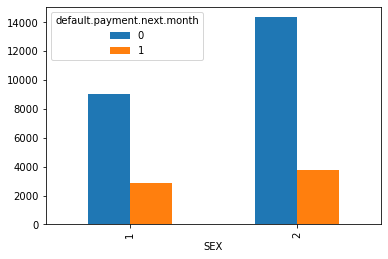

In [146]:
s_df[[0,1]].plot(kind='bar')

From the plot, it's evident that males have a higher probability of defaulting than females, since ~24% of males default compared to ~20% of females.

Also, according to the data, a higher number of females have defaulted (3763) than males (2873) in the previous months.

In [147]:
ed_df = loan.groupby(['EDUCATION','default.payment.next.month'])['default.payment.next.month'].count().unstack()
ed_df['percentage'] = round((ed_df[1]/(ed_df[0]+ed_df[1]))*100,2)
ed_df

default.payment.next.month,0,1,percentage
EDUCATION,,,
1,8549,2036,19.23
2,10700,3330,23.73
3,3680,1237,25.16
4,435,33,7.05


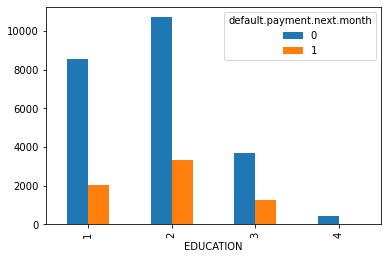

In [148]:
ed_df[[0,1]].plot(kind='bar')

From the plots, it's visible that a greater amount of education tends to reduce the probability of default. This makes sense because lower education may mean a lower salary and limit. Let's check if our assumption is correct.

In [149]:
loan.groupby(['EDUCATION'])['LIMIT_BAL'].mean()

EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    181316.239316
Name: LIMIT_BAL, dtype: float64

Our assumption was perfect customers with graduate school degrees have the highest limits whereas high school pass outs have the least amongst all the categories.

But category '4' customers have their limits between graduate school and university pass-outs, so our initial assumption of '4' being high school dropouts may be wrong. Also, that won't affect our modelling, so over thinking about that won't be effective and useful.

Let's check our marriage status affects the probability of default.

In [150]:
m_df = loan.groupby(['MARRIAGE','default.payment.next.month'])['default.payment.next.month'].count().unstack()
m_df['percentage'] = round((m_df[1]/(m_df[0]+m_df[1]))*100,2)
m_df

default.payment.next.month,0,1,percentage
MARRIAGE,,,
1,10453,3206,23.47
2,12623,3341,20.93
3,288,89,23.61


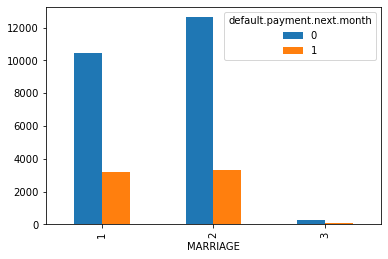

In [151]:
m_df[[0,1]].plot(kind='bar')

Married customers have a higher chance of defaulting than single customers. The other category has the highest probability of default, but that is numerically irrelevant.

Let's bin the ages into groups which would make it easier to look at the plots.

In [152]:
loan['AGE'] = pd.cut(loan['AGE'],bins=[20,30,40,50,60,70,80],labels=[1,2,3,4,5,6])
loan['AGE'].sample(10)

19809    3
1639     3
10719    1
29026    2
24266    2
17996    3
7968     3
24737    2
6649     1
28841    2
Name: AGE, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [153]:
a_df = loan.groupby(['AGE','default.payment.next.month'])['default.payment.next.month'].count().unstack()
a_df['percentage'] = round((a_df[1]/(a_df[0]+a_df[1]))*100,2)
a_df

default.payment.next.month,0,1,percentage
AGE,,,
1,8542,2471,22.44
2,8524,2189,20.43
3,4606,1399,23.30
4,1493,504,25.24
5,189,68,26.46
6,10,5,33.33


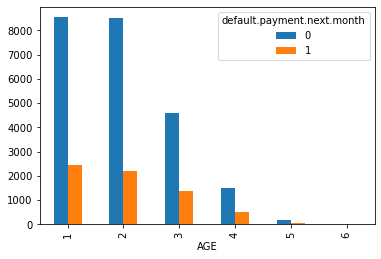

In [154]:
a_df[[0,1]].plot(kind='bar')

Younger customers have fewer chances of defaulting and older customers have a higher probability. But numerically category '6' and '5' are quite irrelevant.

Let's take a look at the limits provided for various age groups, maybe this can clear out or give some sense to the results we are observing.

In [155]:
loan.groupby(['AGE'])['LIMIT_BAL'].mean()

AGE
1    132490.692818
2    197271.539251
3    179680.213156
4    159349.023535
5    200194.552529
6    226000.000000
Name: LIMIT_BAL, dtype: float64

This is surprising, category '6' has the highest mean limit but has the highest probability of default. Even though it's numerically irrelevant, I'm curious about this.

Another interesting observation is that even though younger customers have lower limits, they don't default as much as the older customers

# Modelling

Now we will attempt to build various models, fit the training data and predict on the test data. We will aim to find the best model and check how the accuracy varies with the parameters. 

We will use metrics such as Precision, Recall, F1 Scores and Logarithmic Loss to compare the models. To visualize the results we will make use of line plots and confusion matrix. The plots will help us choose the optimum parameter and confusion matrix will help us to calculate the F1 score. The confusion matrix will also give us the number of predictions with their respective true and predicted label.

Let's split our data into training and test sets. The test set will be used to see how our model performs on the 'new' data.

In [156]:
from sklearn.model_selection import train_test_split
x = loan[['LIMIT_BAL','SEX','MARRIAGE','EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','total_bill','total_pay']]
y = loan['default.payment.next.month']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.preprocessing import MinMaxScaler
mms_xtrain = MinMaxScaler().fit_transform(x_train)
mms_xtest = MinMaxScaler().fit_transform(x_test)

Metrics = pd.DataFrame({'F1':[],'Recall':[]})

Since there are certain variables with large ranges such as 'LIMIT_BAL', 'TOTAL_BILL' and 'TOTAL_PAY', we will use MinMaxScaler function to convert the ranges to 0-1. Since the ranges for all variables are transformed to the same values, the degree to which they will affect the target variable might become equal and avoid biases towards variables with a larger range.

To avoid repeating the code for creating plots and confusion matrix, I will create a function which will reduce the burden on us.

In [157]:
def accplots(param,predict,train,xlabel):
    plt.plot(param,predict,'g')
    plt.plot(param,train,'b')
    plt.title('Variation Of F1 Score')
    plt.xlabel(xlabel)
    plt.ylabel('F1 Score')
    plt.legend(('Prediction','Train'))
def cfmatrix(ytest,ypredict,title):
    cfm = confusion_matrix(ytest,ypredict,labels=[0,1])
    sns.heatmap(cfm,annot=True,fmt='d')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)

We will predominantly make use of recall and F1 scores for evaluating the model. The reason why I'm focusing on these metrics is that they are of the most importance to us. Let me elaborate by connecting this with our problem.

When banks predict the probability of default, they need the predictions to be very accurate. What I mean by this is, if a customer actually defaults, the model should accurately predict this outcome. So, we need the True positive(actual:1,predicted:1) predictions to be high in number and False negatives(actual:1,predicted:0) to be low in number. Since defaults cost highly to the banks and cause a high level of risk. Since recall is the ratio of true positives and the sum of true positives and false negatives, we need it to be as large as possible.

But if our model predicts some '0' labels as '1', that is allowable. Since this wrong prediction isn't as costly to the banks. Therefore a high precision of the model isn't our top priority. Precision is the ratio of true positives and the sum of true positives and false positives.

**K Nearest Neighbours**

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data. If we plot the points (training data) on a graph, we may be able to locate some clusters or groups. Now, given an unclassified point, we can assign it to a group by observing what group its nearest neighbours belong to.

One of the parameters of the K-Nearest neighbours algorithm is the 'n_neighbors' value. It decides the number of neighbours which have to taken into consideration to classify a point (test data). We will vary this parameter and try to find the optimum number.

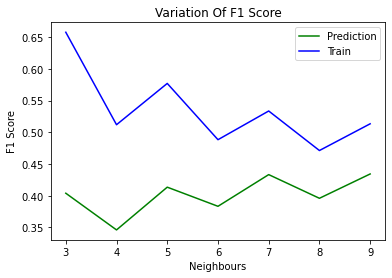

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neighbors,score_predict,score_train = [3,4,5,6,7,8,9],[],[]
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(mms_xtrain,y_train)
    y_ptrain = knn.predict(mms_xtrain)
    y_predict = knn.predict(mms_xtest)
    score_predict.append(metrics.f1_score(y_test,y_predict))
    score_train.append(metrics.f1_score(y_train,y_ptrain))
accplots(neighbors,score_predict,score_train,'Neighbours')

From the plot, it's evident that when we increase the number of neighbours, F1 scores of training data reduces and that of test data increases. Another trend which is observed is, F1 scores for even neighbours are less than odd numbers before and after itself. This is because when we set neighbours to an even number there is a possibility of a tie occurring. For example when neighbours = 4, there are chances of 2 of them belonging to '0' and other 2 belonging to '1'. In this situation, the algorithm chooses the label which came first in the training data.

Therefore we will choose neighbours = 5, for our further predictions. Even though higher values have larger F1 scores, I'm pretty sure choosing these values will cause overfitting on the training data. Now we will predict the labels for the test data and analyze the confusion matrix.

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4663
           1       0.55      0.33      0.41      1337

    accuracy                           0.79      6000
   macro avg       0.69      0.63      0.64      6000
weighted avg       0.77      0.79      0.77      6000



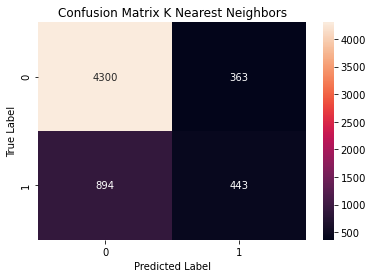

In [159]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(mms_xtrain,y_train)
y_predict = knn.predict(mms_xtest)
from sklearn.metrics import confusion_matrix
cfmatrix(y_test,y_predict,'Confusion Matrix K Nearest Neighbors')
print(metrics.classification_report(y_test,y_predict))

The precision and recall for '0' label are very high but it's the complete opposite for '1' label. This may be due to an imbalanced dataset. But we will tackle this problem after finding a couple of models which will give us a decent result.

In [160]:
new_row = pd.Series(data={'F1':0.41,'Recall':0.33},name='KNN')
Metrics = Metrics.append(new_row, ignore_index=False)

Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables. But instead of giving the exact value of the label, it gives the probabilistic values which lie between 0 and 1. Logistic Regression is quite similar to Linear Regression except that how they are used. 

In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1). The curve from the logistic function indicates the likelihood of something, in our case whether the customer will default(1) or not(0).

For this algorithm, we will vary the regularization factor. Regularizations also known as ‘shrinkage’ methods, reduce or shrink the coefficients in the resulting regression. This reduces the variance in the model: as input variables are changed, the model’s prediction changes less than it would have without the regularization. We use this parameter to avoid overfitting.

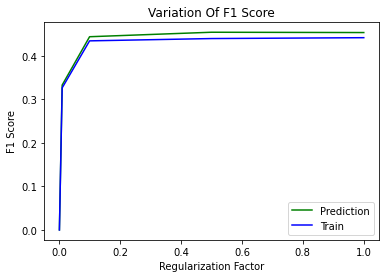

In [161]:
from sklearn.linear_model import LogisticRegression
reg,score_train,score_predict = [0.001,0.01,0.1,0.5,1.0],[],[]

for r in reg:
    lr = LogisticRegression(C=r, solver='liblinear',penalty='l1')
    lr.fit(mms_xtrain,y_train)
    y_ptrain = lr.predict(mms_xtrain)
    y_predict = lr.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))
accplots(reg,score_predict,score_train,'Regularization Factor')

It's visible from the plot that the F1 score suddenly increases in 0 to 0.1 range and stays constant for the remaining values. To avoid any overfitting, we will keep the value of the regularization factor as 0.1.

Now let's predict the labels for the test data.

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4663
           1       0.69      0.27      0.39      1337

    accuracy                           0.81      6000
   macro avg       0.76      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000

Log-Loss: 0.4463340303642419


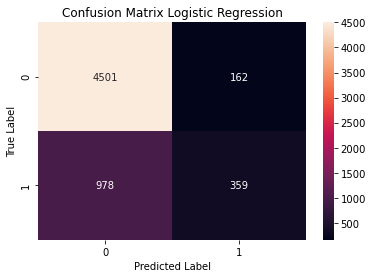

In [162]:
lr = LogisticRegression(C=0.1, solver='liblinear')
lr.fit(mms_xtrain,y_train)
y_predict = lr.predict(mms_xtest)
probab = lr.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Logistic Regression')
print(metrics.classification_report(y_test,y_predict))
print('Log-Loss:',metrics.log_loss(y_test,probab))

The recall for the positive label is very low and that is not a good sign. Since predicting an actual default as not a default, maybe very costly for the bank. But the model has a decent precision. 

In [163]:
new_row = pd.Series(data={'F1':0.39,'Recall':0.27},name='LR')
Metrics = Metrics.append(new_row, ignore_index=False)

Decision Tree

Decision tree analysis is a predictive modelling tool that can be applied across many areas. Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. Decisions trees are the most powerful algorithms that fall under the category of supervised algorithms. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. A decision tree simply asks a question and based on the answer (Yes/No), it will further split the tree into subtrees.

We will vary the depth parameter for the model. It specifies the depth up to which the tree must produce leaf nodes/ prediction nodes. A low depth will cause underfitting and very high will cause overfitting.

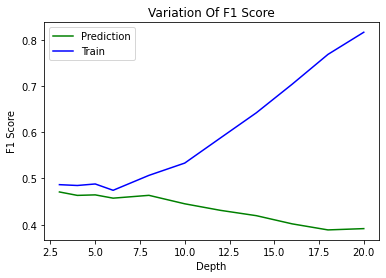

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
depths,score_train,score_predict = [3,4,5,6,8,10,12,14,16,18,20],[],[]
for depth in depths:
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    dtc.fit(mms_xtrain,y_train)
    y_ptrain = dtc.predict(mms_xtrain)
    y_predict = dtc.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))
accplots(depths,score_predict,score_train,'Depth')

The above plot clearly shows a case of overfitting when the depth increases. As the F1 score for training data increases but the F1 score for the test data decreases. We will set the depth value to 5, to avoid overfitting.

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.66      0.36      0.46      1337

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.79      6000

Log Loss: 0.4620569948230409


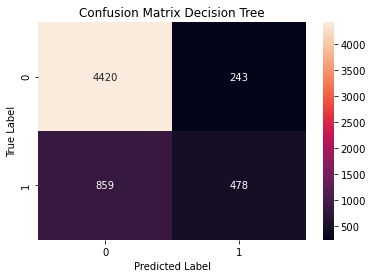

In [165]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(mms_xtrain,y_train)
y_predict = dtc.predict(mms_xtest)
probab = dtc.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Decision Tree')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

This model has a better recall for the positive label, sign of improvement from previous models.

In [166]:
new_row = pd.Series(data={'F1':0.46,'Recall':0.36},name='DTC')
Metrics = Metrics.append(new_row, ignore_index=False)

Let's visualize the tree that has been generated by the algorithm.

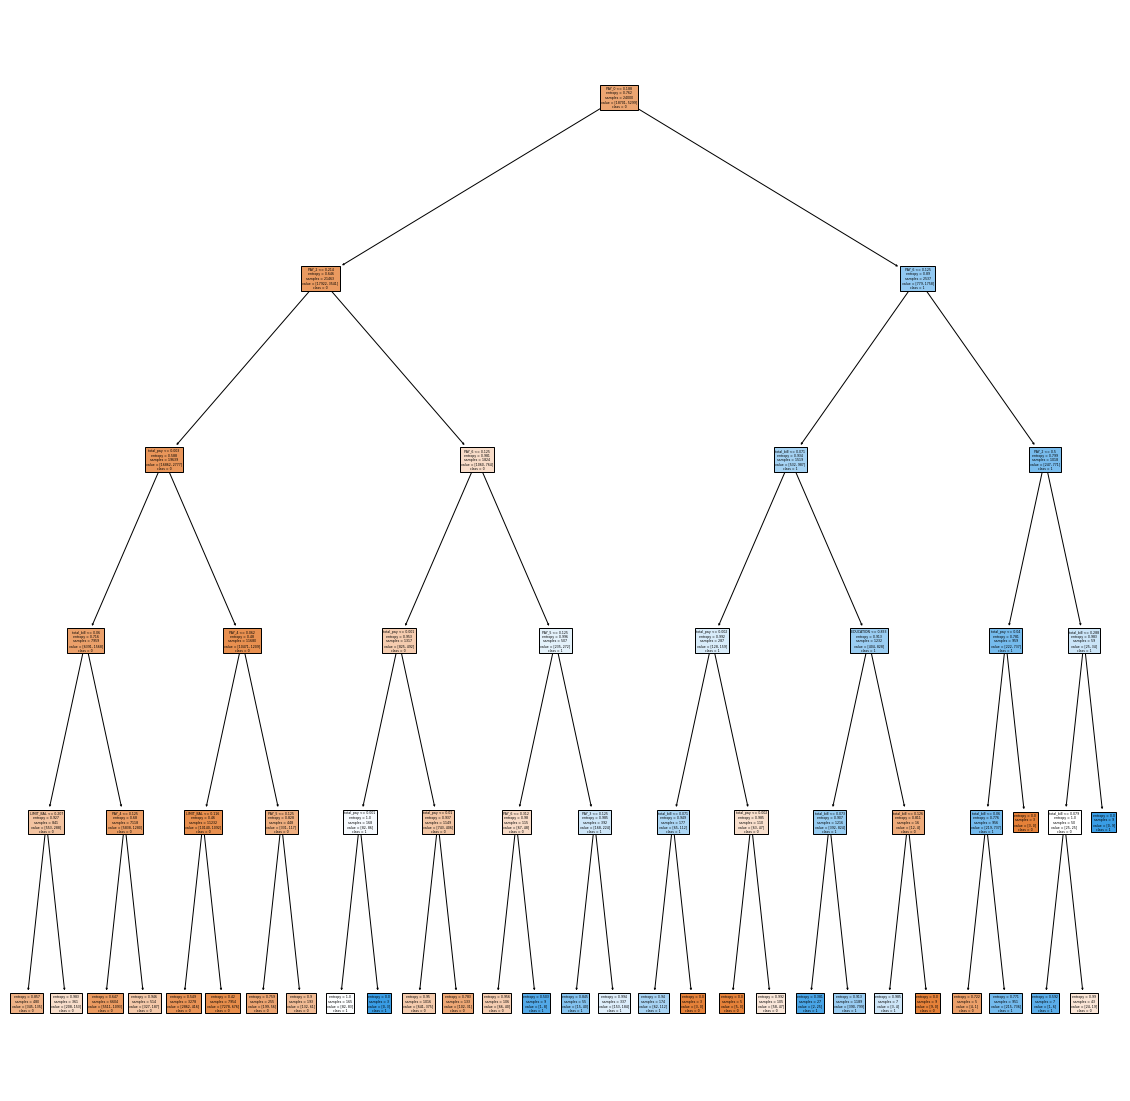

In [167]:
fig = plt.figure(figsize=(20,20))
features = ['LIMIT_BAL','SEX','MARRIAGE','EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','total_bill','total_pay']
_ = tree.plot_tree(dtc, 
                   feature_names=features,  
                   class_names=['0','1'],
                   filled=True)

Support Vector Machine

The objective of the support vector machine algorithm is to find a hyperplane in N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, many possible hyperplanes could be chosen. Our objective is to find a plane that has the maximum margin. Margin is the maximum distance between data points of both classes. Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane.

We will vary the kernel function for this algorithm. Kernel Function is a method used to take data as input and transform into the required form of processing data. So, Kernel Function generally transforms the training set of data so that a non-linear decision surface can be transformed into a linear equation in a higher number of dimension spaces.

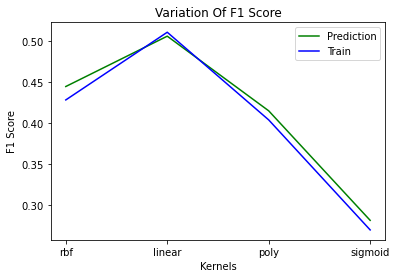

In [168]:
from sklearn.svm import SVC
kernels,score_train,score_predict = ['rbf','linear','poly','sigmoid'],[],[]
for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(mms_xtrain,y_train)
    y_ptrain = svc.predict(mms_xtrain)
    y_predict = svc.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))
accplots(kernels,score_predict,score_train,'Kernels')

It's evident that linear kernel function gives us the optimum F1 score, therefore we will use this function for further modelling.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4663
           1       0.51      0.50      0.51      1337

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000



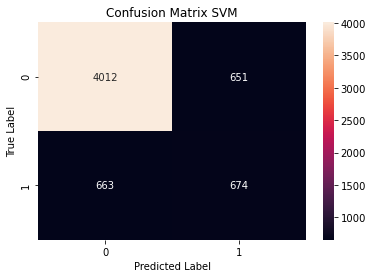

In [169]:
svc = SVC(kernel='linear')
svc.fit(mms_xtrain,y_train)
y_predict = svc.predict(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix SVM')
print(metrics.classification_report(y_test,y_predict))

This is the largest F1 score and recall we have obtained till now. I was expecting this since SVM has an effective logic and doesn't assume anything based on the features.

In [170]:
new_row = pd.Series(data={'F1':0.51,'Recall':0.50},name='SVM')
Metrics = Metrics.append(new_row, ignore_index=False)

Naive Bayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation: P(A|B) = (P(B|A)xP(B))/P(A)

Gaussian NB

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The distribution of the features is assumed to be Gaussian/Normal.

We will not vary any parameters,since there are none required for this algorithm.

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4663
           1       0.52      0.49      0.51      1337

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.69      6000
weighted avg       0.78      0.79      0.78      6000

Log Loss: 1.6884988149966653


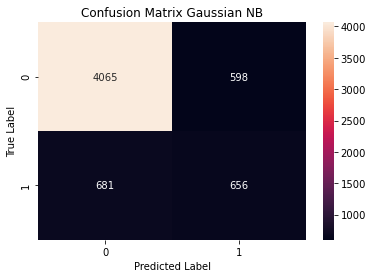

In [171]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(mms_xtrain,y_train)
y_predict = gnb.predict(mms_xtest)
probab = gnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Gaussian NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:', metrics.log_loss(y_test,probab))

The recall for this model is also good, since it's quite close to the recall obtained from the SVM model.

In [172]:
new_row = pd.Series(data={'F1':0.51,'Recall':0.49},name='GNB')
Metrics = Metrics.append(new_row, ignore_index=False)

Multinomial NB

MultinomialB implements the Multinomial Naive Bayes algorithm for classification. The distribution of the features is assumed to be Multinomial.

We will vary the smoothing parameter( alpha) for the model. Additive smoothing is a technique used to smooth categorical data. It is a type of shrinkage estimator, as the resulting estimate will be between the experimental probability and the uniform probability. This parameter will be varied for all the remaining naive Bayes classifiers as well.

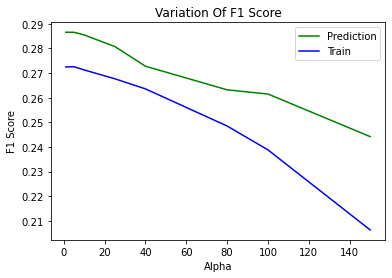

In [173]:
from sklearn.naive_bayes import MultinomialNB
alphas,score_train,score_predict = [1,5,10,25,40,80,100,150],[],[]
for alpha in alphas:
    mnb = MultinomialNB(alpha=alpha)
    mnb.fit(mms_xtrain,y_train)
    y_ptrain = mnb.predict(mms_xtrain)
    y_predict = mnb.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))
accplots(alphas,score_predict,score_train,'Alpha')

It's visible that increasing the value of the smoothing parameter will decrease the F1 score. Therefore we will set the alpha value to 5.

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      4663
           1       0.70      0.18      0.29      1337

    accuracy                           0.80      6000
   macro avg       0.75      0.58      0.59      6000
weighted avg       0.78      0.80      0.75      6000

Log Loss: 0.4648881719687605


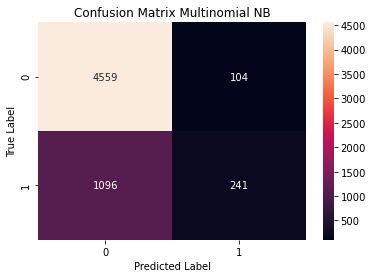

In [174]:
mnb = MultinomialNB(alpha=5)
mnb.fit(mms_xtrain,y_train)
y_predict = mnb.predict(mms_xtest)
probab = mnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Multinomial NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

I don't think we can consider this model for further analysis, since the recall is very low.

In [175]:
new_row = pd.Series(data={'F1':0.29,'Recall':0.18},name='MNB')
Metrics = Metrics.append(new_row, ignore_index=False)

Complement NB

Complement NB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model’s weights. CNB regularly outperforms MNB (often by a considerable margin).

We will vary the smoothing parameter.

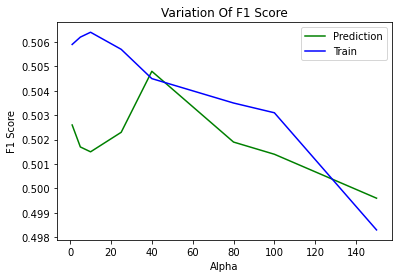

In [176]:
from sklearn.naive_bayes import ComplementNB
alphas,score_train,score_predict = [1,5,10,25,40,80,100,150],[],[]
for alpha in alphas:
    cnb = ComplementNB(alpha=alpha)
    cnb.fit(mms_xtrain,y_train)
    y_ptrain = cnb.predict(mms_xtrain)
    y_predict = cnb.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))
accplots(alphas,score_predict,score_train,'Alpha')

As we increase the alpha value, F1 score for training data decreases but for test data it increases first then decreases. Therefore we will choose the point at which sudden gradient change is observed, that is alpha equal to 40. 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4663
           1       0.51      0.50      0.50      1337

    accuracy                           0.78      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000

Log Loss: 0.597062183735191


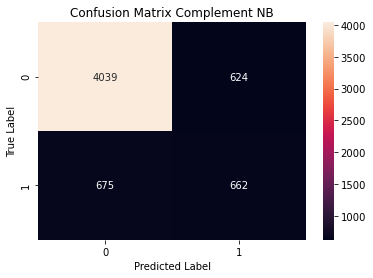

In [177]:
cnb = ComplementNB(alpha=40)
cnb.fit(mms_xtrain,y_train)
y_predict = cnb.predict(mms_xtest)
probab = cnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Complement NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

As expected CNB performed better than MNB. The model generated a decent recall similar to SVM.

In [178]:
new_row = pd.Series(data={'F1':0.50,'Recall':0.50},name='CNB')
Metrics = Metrics.append(new_row, ignore_index=False)

Categorical NB

CategoricalNB implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature, which is described by the index, has its own categorical distribution. For each feature in the training set, CategoricalNB estimates a categorical distribution for each feature, conditioned on the labels.

We will vary the smoothing parameter.

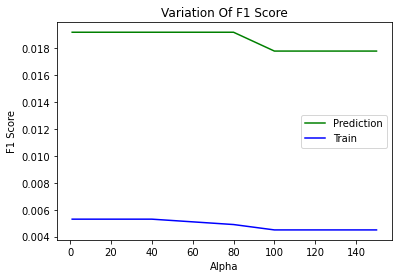

In [179]:
from sklearn.naive_bayes import CategoricalNB
alphas,score_train,score_predict = [1,5,10,25,40,80,100,150],[],[]
for alpha in alphas:
    catnb = CategoricalNB(alpha=alpha)
    catnb.fit(mms_xtrain,y_train)
    y_ptrain = catnb.predict(mms_xtrain)
    y_predict = catnb.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))
accplots(alphas,score_predict,score_train,'Alpha')

The F1 score doesn't change much after altering the alpha values. But the F1 scores are very less so this model won't be of much use to us.

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4663
           1       0.93      0.01      0.02      1337

    accuracy                           0.78      6000
   macro avg       0.85      0.50      0.45      6000
weighted avg       0.81      0.78      0.68      6000

Log Loss: 0.52630060767028


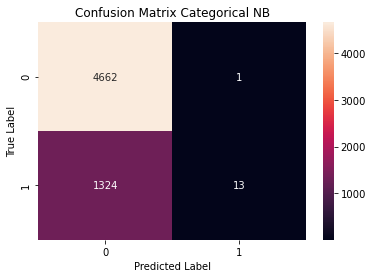

In [180]:
catnb = CategoricalNB(alpha=40)
catnb.fit(mms_xtrain,y_train)
y_predict = catnb.predict(mms_xtest)
probab = catnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Categorical NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

The recall for the model is very low and is heavily affected by the fact that the data is imbalanced.

In [181]:
new_row = pd.Series(data={'F1':0.02,'Recall':0.01},name='CatNB')
Metrics = Metrics.append(new_row, ignore_index=False)

Random Forest

Random forest is an ensemble machine learning model. An ensemble machine learning model is a model which is a collection of several smaller models. The Random Forest model of machine learning is nothing but a collection of several decision trees. These trees come together to a combined decision to give the output. The average of all the trees is selected as the output.

We will vary the estimator parameter, which is the number of decision trees under consideration. Optimum depth for the trees was found to be 5 in the Decision Tree Model, therefore we will use the same for this model as well.

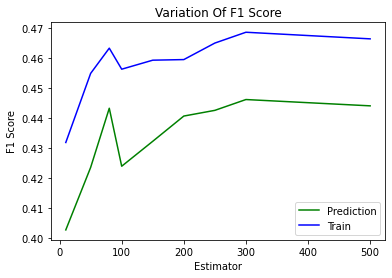

In [182]:
from sklearn.ensemble import RandomForestClassifier
estimators,score_train,score_predict = [10,50,80,100,150,200,250,300,500],[],[]
for est in estimators:
    rfc = RandomForestClassifier(n_estimators=est,criterion='entropy',max_depth=5,random_state=10)
    rfc.fit(mms_xtrain,y_train)
    y_ptrain = rfc.predict(mms_xtrain)
    y_predict = rfc.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))

accplots(estimators,score_predict,score_train,'Estimator')

From the plot it's evident that F1 scores first increase, then decrease when estimators is set as 100 and increase again. We will use estimators set to 300 for further analysis.

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4663
           1       0.68      0.33      0.45      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000

Log Loss: 0.4398713231684267


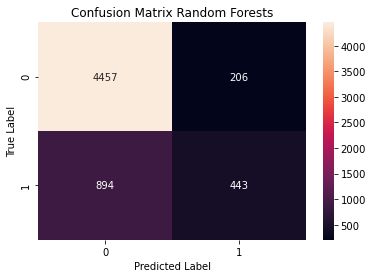

In [183]:
rfc = RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=5,random_state=10)
rfc.fit(mms_xtrain,y_train)
y_predict = rfc.predict(mms_xtest)
probab = rfc.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Random Forests')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

This model generates a decent F1 score but less recall.

In [184]:
new_row = pd.Series(data={'F1':0.45,'Recall':0.33},name='RFC')
Metrics = Metrics.append(new_row, ignore_index=False)

Let's comapare all the models we have tested till now. We will create a dataframe using pandas and sort them by F1 score and Recall. 

In [185]:
Metrics.sort_values(by=['F1','Recall'],ascending=False)

,F1,Recall
SVM,0.51,0.50
GNB,0.51,0.49
CNB,0.50,0.50
DTC,0.46,0.36
RFC,0.45,0.33
KNN,0.41,0.33
LR,0.39,0.27
MNB,0.29,0.18
CatNB,0.02,0.01


The best models which we have built till now are Support Vector Machine, Gaussian Naive Bayes and Complement Naive Bayes. We will now address the problem of imbalanced dataset, with the help of resampling.

# Resampling

In [186]:
print(loan['default.payment.next.month'].value_counts())
print(y_train.value_counts())

0    23364
1     6636
Name: default.payment.next.month, dtype: int64
0    18701
1     5299
Name: default.payment.next.month, dtype: int64


Clearly, we have an imbalanced dataset, since the data with '1' label or default is minuscule as compared to '0' label or not default. This will cause issues with certain algorithms. To avoid this dilemma we will make use of resampling. Resampling is a method that consists of drawing repeated samples from the original data samples. Resampling involves the selection of randomized cases with replacement from the original data sample in such a manner that each number of the sample drawn has several cases that are similar to the original data sample. Due to replacement, the drawn number of samples that are used by the method of resampling consists of repetitive cases. 

Algorithms such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class.

So we will use techniques such as OverSampling, UnderSampling, SMOTE and NearMiss Algorithm.

In [187]:
from sklearn.utils import resample
conc = pd.DataFrame(x_train)
conc['default.payment.next.month'] = y_train
df_maj = conc[conc['default.payment.next.month']==0]
df_min = conc[conc['default.payment.next.month']==1]
print(df_maj['default.payment.next.month'].value_counts())
print(df_min['default.payment.next.month'].value_counts())
conc

0    18701
Name: default.payment.next.month, dtype: int64
1    5299
Name: default.payment.next.month, dtype: int64


,LIMIT_BAL,SEX,MARRIAGE,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,total_bill,total_pay,default.payment.next.month
28004,20000.0,2,2,2,1,1,2,0,0,0,0,104646.0,34027.0,1
8560,50000.0,2,1,2,2,0,0,0,0,0,0,1862.0,1896.0,0
15484,180000.0,1,1,1,2,1,0,0,0,0,0,0.0,0.0,0
12531,20000.0,2,2,2,3,0,0,0,0,0,0,17190.0,13125.0,0
24473,340000.0,1,2,1,3,0,0,0,0,0,0,9387.0,9387.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17289,170000.0,2,1,3,2,1,2,0,0,0,0,266003.0,40815.0,1
5192,330000.0,2,1,1,3,0,0,0,0,0,0,4122.0,0.0,0
12172,50000.0,1,2,2,1,0,0,0,0,0,0,187023.0,6105.0,0
235,80000.0,1,2,1,2,0,0,0,0,0,0,41852.0,36293.0,0


Under Sampling

In this technique we will under sample the majority class. It aims to balance class distribution by randomly eliminating majority class examples.

In [188]:
df_maj_ds = resample(df_maj,replace=False,n_samples=5299,random_state=1234)
df_ds = pd.concat([df_maj_ds,df_min])
print(df_ds['default.payment.next.month'].value_counts())
df_ds

1    5299
0    5299
Name: default.payment.next.month, dtype: int64


,LIMIT_BAL,SEX,MARRIAGE,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,total_bill,total_pay,default.payment.next.month
12690,150000.0,1,2,1,1,0,0,0,0,0,0,6642.0,6546.0,0
29122,210000.0,2,1,3,4,0,0,2,0,0,0,525363.0,20973.0,0
10770,50000.0,2,2,3,1,2,0,0,2,0,0,143059.0,18532.0,0
6109,200000.0,2,1,1,2,0,0,0,0,0,0,1013495.0,34237.0,0
13299,30000.0,1,2,2,1,0,0,0,0,0,0,171017.0,8291.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22505,310000.0,2,1,1,2,0,0,0,0,0,0,3072.0,753.0,1
17137,20000.0,2,2,1,1,0,0,0,2,0,0,26054.0,4758.0,1
19433,180000.0,2,1,2,2,1,0,0,0,0,0,0.0,0.0,1
2962,100000.0,1,2,1,2,0,0,0,0,2,0,5147.0,4326.0,1


Over Sampling

Oversampling involves supplementing the training data with multiple copies of some of the minority classes. It aims to balance the dataset by randomly duplicating the minority class.

In [189]:
df_min_us = resample(df_min,replace=True,n_samples=18701,random_state=1234)
df_us = pd.concat([df_maj,df_min_us])
print(df_us['default.payment.next.month'].value_counts())
df_us

1    18701
0    18701
Name: default.payment.next.month, dtype: int64


,LIMIT_BAL,SEX,MARRIAGE,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,total_bill,total_pay,default.payment.next.month
8560,50000.0,2,1,2,2,0,0,0,0,0,0,1862.0,1896.0,0
15484,180000.0,1,1,1,2,1,0,0,0,0,0,0.0,0.0,0
12531,20000.0,2,2,2,3,0,0,0,0,0,0,17190.0,13125.0,0
24473,340000.0,1,2,1,3,0,0,0,0,0,0,9387.0,9387.0,0
4473,240000.0,2,2,1,1,1,0,0,0,0,0,11719.0,12617.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27298,50000.0,1,2,1,2,0,0,2,3,2,2,112440.0,7900.0,1
8641,20000.0,1,2,1,1,1,2,3,2,0,0,117449.0,3844.0,1
22900,30000.0,2,1,2,2,2,2,2,2,2,2,118047.0,6352.0,1
10853,120000.0,2,2,1,1,0,0,0,2,0,0,476459.0,21760.0,1


SMOTE

Synthetic Minority Oversampling Technique or SMOTE, is a type of data augmentation for the minority class. It involves synthesizing of new samples from the existing samples. A random sample from the minority class is first chosen. Then k of the nearest neighbors for that sample are found (typically k=5). A randomly selected neighbor is chosen and a synthetic sample is created at a randomly selected point between the two examples in feature space. Basically, in oversampling duplicates are produced, but in SMOTE samples are generated(by mixing and matching) with the help of minority labels in the training data.

To implement SMOTE algorithm we will make use of the Imbalanced-Learn library.

In [190]:
from imblearn.over_sampling import SMOTE
df_smote,smote_ytrain = SMOTE(random_state=1234).fit_sample(x_train,y_train)
print(df_smote['default.payment.next.month'].value_counts())
df_smote['AGE'] = df_smote['AGE'].fillna(df_smote['AGE'].mode()[0])
df_smote

1    18701
0    18701
Name: default.payment.next.month, dtype: int64


,LIMIT_BAL,SEX,MARRIAGE,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,total_bill,total_pay,default.payment.next.month
0,20000.000000,2,2,2,1,1,2,0,0,0,0,1.046460e+05,34027.000000,1
1,50000.000000,2,1,2,2,0,0,0,0,0,0,1.862000e+03,1896.000000,0
2,180000.000000,1,1,1,2,1,0,0,0,0,0,0.000000e+00,0.000000,0
3,20000.000000,2,2,2,3,0,0,0,0,0,0,1.719000e+04,13125.000000,0
4,340000.000000,1,2,1,3,0,0,0,0,0,0,9.387000e+03,9387.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37397,234541.939630,1,2,1,1,0,0,0,0,0,0,2.566268e+04,27273.321026,1
37398,180000.000000,2,2,2,1,0,0,0,0,0,0,5.999245e+04,45772.250415,1
37399,70000.000000,1,1,2,1,2,2,1,1,0,0,2.485293e+05,7655.367836,1
37400,103455.293887,2,1,1,1,1,0,0,0,0,0,8.181930e+04,20235.764890,1


Near Miss

NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process. To prevent problem of information loss in most under-sampling techniques, near-neighbor methods are widely used.

To implement Near Miss algorithm we will make use of the Imbalanced-Learn library.

In [191]:
from imblearn.under_sampling import NearMiss
df_nm,nm_ytrain = NearMiss().fit_sample(x_train,y_train)
print(df_nm['default.payment.next.month'].value_counts())
df_nm

1    5299
0    5299
Name: default.payment.next.month, dtype: int64


,LIMIT_BAL,SEX,MARRIAGE,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,total_bill,total_pay,default.payment.next.month
0,150000.0,2,1,1,2,1,0,0,0,0,0,0.0,0.0,0
1,150000.0,2,1,1,2,1,0,0,0,0,0,0.0,0.0,0
2,360000.0,1,1,2,3,1,0,0,0,0,0,0.0,0.0,0
3,150000.0,2,1,1,2,1,0,0,0,0,0,0.0,0.0,0
4,150000.0,2,1,1,2,1,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,310000.0,2,1,1,2,0,0,0,0,0,0,3072.0,753.0,1
10594,20000.0,2,2,1,1,0,0,0,2,0,0,26054.0,4758.0,1
10595,180000.0,2,1,2,2,1,0,0,0,0,0,0.0,0.0,1
10596,100000.0,1,2,1,2,0,0,0,0,2,0,5147.0,4326.0,1


Now we will seperate the data into features and target variable. Since we transformed our data using MinMaxScaler for intial modelling we will use the same here as well.

In [192]:
ds_xtrain = df_ds[['LIMIT_BAL','SEX','MARRIAGE','EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','total_bill','total_pay']]
ds_ytrain = df_ds['default.payment.next.month']
us_xtrain = df_us[['LIMIT_BAL','SEX','MARRIAGE','EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','total_bill','total_pay']]
us_ytrain = df_us['default.payment.next.month']
smote_xtrain = df_smote[['LIMIT_BAL','SEX','MARRIAGE','EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','total_bill','total_pay']]
nm_xtrain = df_nm[['LIMIT_BAL','SEX','MARRIAGE','EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','total_bill','total_pay']]
ds_xtrain = MinMaxScaler().fit_transform(ds_xtrain)
us_xtrain = MinMaxScaler().fit_transform(us_xtrain)
smote_xtrain = MinMaxScaler().fit_transform(smote_xtrain)
nm_xtrain = MinMaxScaler().fit_transform(nm_xtrain)

# Re-Modelling

Here we will fit the newly generated datasets on the models which performed impressively before. 

SVM

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4663
           1       0.51      0.51      0.51      1337

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000



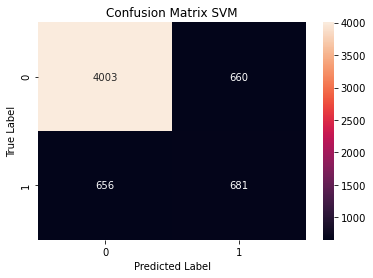

In [193]:
svc = SVC(kernel='linear')
svc.fit(ds_xtrain,ds_ytrain)
y_predict = svc.predict(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix SVM')
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4663
           1       0.51      0.51      0.51      1337

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000



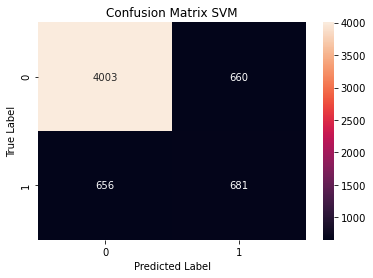

In [194]:
svc = SVC(kernel='linear')
svc.fit(us_xtrain,us_ytrain)
y_predict = svc.predict(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix SVM')
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4663
           1       0.46      0.50      0.48      1337

    accuracy                           0.76      6000
   macro avg       0.66      0.67      0.66      6000
weighted avg       0.77      0.76      0.76      6000



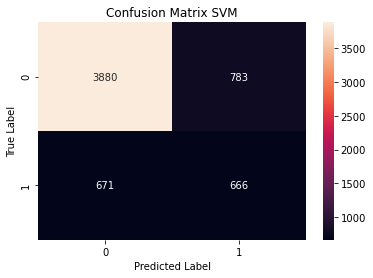

In [195]:
svc = SVC(kernel='linear')
svc.fit(smote_xtrain,smote_ytrain)
y_predict = svc.predict(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix SVM')
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      4663
           1       0.34      0.48      0.39      1337

    accuracy                           0.67      6000
   macro avg       0.58      0.60      0.59      6000
weighted avg       0.72      0.67      0.69      6000



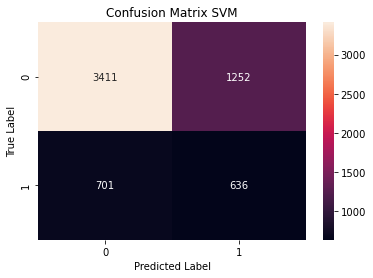

In [196]:
svc = SVC(kernel='linear')
svc.fit(nm_xtrain,nm_ytrain)
y_predict = svc.predict(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix SVM')
print(metrics.classification_report(y_test,y_predict))

The best results were obtained for undersampled and oversampled datasets. But one unique observation is that the results for both the techniques were exactly the same. This may be due to the fact that both the techniques contain duplicates, therefore nothing 'new' was provided to the models.

In [197]:
new_row = pd.Series(data={'F1':0.51,'Recall':0.51},name='SVM_US')
Metrics = Metrics.append(new_row, ignore_index=False)
new_row = pd.Series(data={'F1':0.51,'Recall':0.51},name='SVM_OS')
Metrics = Metrics.append(new_row, ignore_index=False)

Gaussian NB

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4663
           1       0.49      0.53      0.51      1337

    accuracy                           0.77      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.77      0.78      6000

Log Loss: 1.8222811973579067


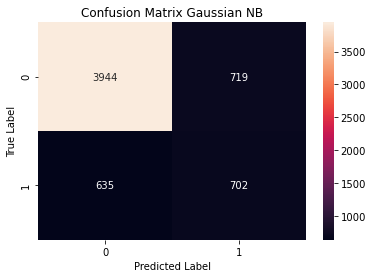

In [198]:
gnb = GaussianNB()
gnb.fit(ds_xtrain,ds_ytrain)
y_predict = gnb.predict(mms_xtest)
probab = gnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Gaussian NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:', metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4663
           1       0.50      0.52      0.51      1337

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000

Log Loss: 1.6785273760937216


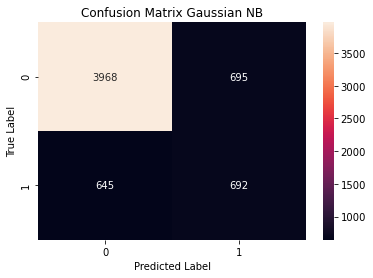

In [199]:
gnb = GaussianNB()
gnb.fit(us_xtrain,us_ytrain)
y_predict = gnb.predict(mms_xtest)
probab = gnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Gaussian NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:', metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4663
           1       0.50      0.53      0.51      1337

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000

Log Loss: 1.6000901322873444


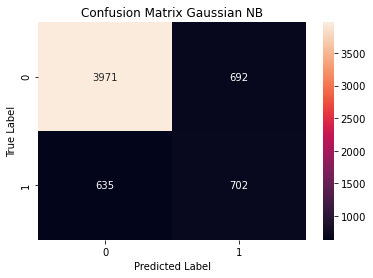

In [200]:
gnb = GaussianNB()
gnb.fit(smote_xtrain,smote_ytrain)
y_predict = gnb.predict(mms_xtest)
probab = gnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Gaussian NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:', metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      4663
           1       0.31      0.48      0.37      1337

    accuracy                           0.64      6000
   macro avg       0.56      0.58      0.56      6000
weighted avg       0.71      0.64      0.66      6000

Log Loss: 4.986389413882623


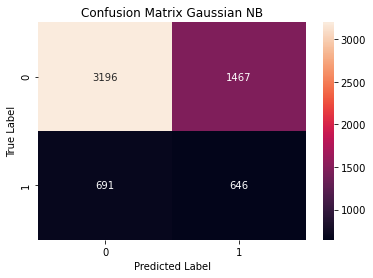

In [201]:
gnb = GaussianNB()
gnb.fit(nm_xtrain,nm_ytrain)
y_predict = gnb.predict(mms_xtest)
probab = gnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Gaussian NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:', metrics.log_loss(y_test,probab))

The best result was obatained after making use of the SMOTE and under sampled training data. We have generated the highest recall till now of 0.53.

In [202]:
new_row = pd.Series(data={'F1':0.51,'Recall':0.53},name='GNB-SMT')
Metrics = Metrics.append(new_row, ignore_index=False)
new_row = pd.Series(data={'F1':0.51,'Recall':0.53},name='GNB-DS')
Metrics = Metrics.append(new_row, ignore_index=False)

Complement NB

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4663
           1       0.51      0.50      0.50      1337

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000

Log Loss: 0.6035557428631557


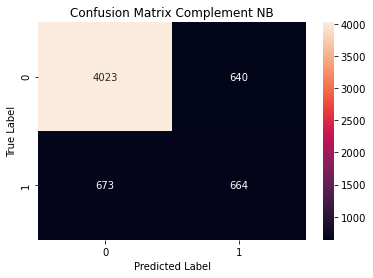

In [203]:
cnb = ComplementNB(alpha=40)
cnb.fit(ds_xtrain,ds_ytrain)
y_predict = cnb.predict(mms_xtest)
probab = cnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Complement NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4663
           1       0.51      0.49      0.50      1337

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000

Log Loss: 0.5979302700075207


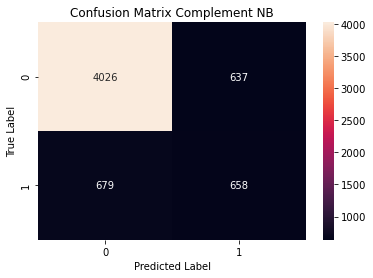

In [204]:
cnb = ComplementNB(alpha=40)
cnb.fit(us_xtrain,us_ytrain)
y_predict = cnb.predict(mms_xtest)
probab = cnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Complement NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4663
           1       0.51      0.48      0.50      1337

    accuracy                           0.78      6000
   macro avg       0.68      0.67      0.68      6000
weighted avg       0.78      0.78      0.78      6000

Log Loss: 0.5937058596139295


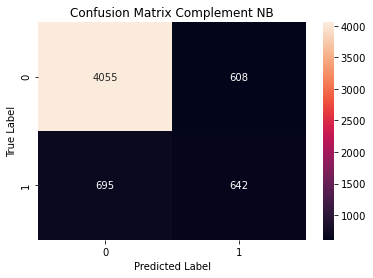

In [205]:
cnb = ComplementNB(alpha=40)
cnb.fit(smote_xtrain,smote_ytrain)
y_predict = cnb.predict(mms_xtest)
probab = cnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Complement NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4663
           1       0.49      0.47      0.48      1337

    accuracy                           0.77      6000
   macro avg       0.67      0.66      0.67      6000
weighted avg       0.77      0.77      0.77      6000

Log Loss: 0.621952712971226


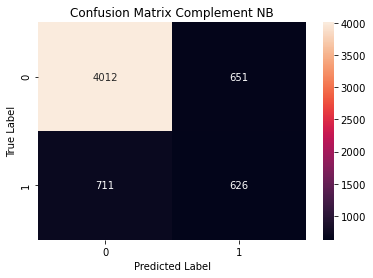

In [206]:
cnb = ComplementNB(alpha=40)
cnb.fit(nm_xtrain,nm_ytrain)
y_predict = cnb.predict(mms_xtest)
probab = cnb.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Complement NB')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

We haven't obtained a better model than before, so we won't be considering any of the above ones for further analysis. One of the reasons we weren't able to generate a better model than before is because Complement NB model is suited for imbalanced datasets. The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier, which makes it suitable for imbalanced datasets. 

Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      4663
           1       0.41      0.63      0.50      1337

    accuracy                           0.72      6000
   macro avg       0.64      0.69      0.65      6000
weighted avg       0.77      0.72      0.74      6000

Log Loss: 0.7074874268901689


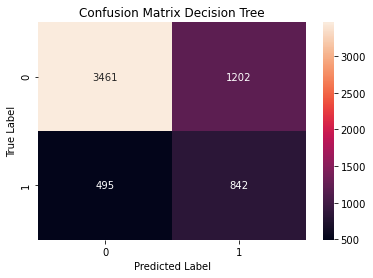

In [207]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(ds_xtrain,ds_ytrain)
y_predict = dtc.predict(mms_xtest)
probab = dtc.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Decision Tree')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4663
           1       0.52      0.52      0.52      1337

    accuracy                           0.79      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.79      0.79      0.79      6000

Log Loss: 0.5464927529872204


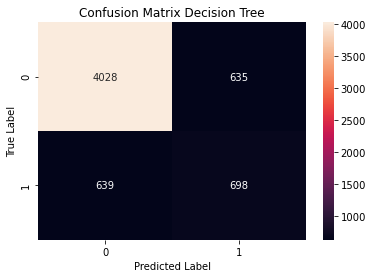

In [208]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(us_xtrain,us_ytrain)
y_predict = dtc.predict(mms_xtest)
probab = dtc.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Decision Tree')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4663
           1       0.47      0.48      0.48      1337

    accuracy                           0.77      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.77      0.77      0.77      6000

Log Loss: 0.5610802505615216


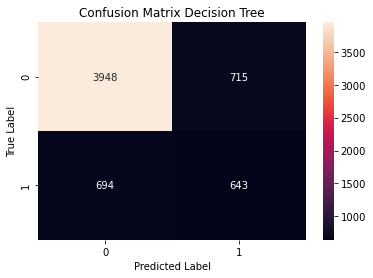

In [209]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(smote_xtrain,smote_ytrain)
y_predict = dtc.predict(mms_xtest)
probab = dtc.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Decision Tree')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      4663
           1       0.33      0.44      0.37      1337

    accuracy                           0.67      6000
   macro avg       0.57      0.59      0.58      6000
weighted avg       0.71      0.67      0.69      6000

Log Loss: 4.293639750479048


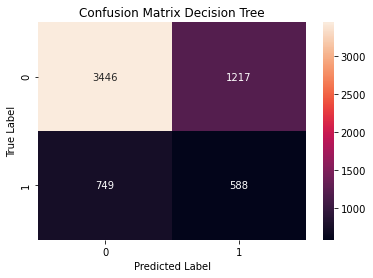

In [210]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(nm_xtrain,nm_ytrain)
y_predict = dtc.predict(mms_xtest)
probab = dtc.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Decision Tree')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

Wow! We just achieved our highest recall till now, of 0.63!

In [211]:
new_row = pd.Series(data={'F1':0.50,'Recall':0.63},name='DTC_DS')
Metrics = Metrics.append(new_row, ignore_index=False)
new_row = pd.Series(data={'F1':0.52,'Recall':0.52},name='DTC_US')
Metrics = Metrics.append(new_row, ignore_index=False)

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4663
           1       0.49      0.60      0.54      1337

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.78      6000

Log Loss: 0.5662430169235787


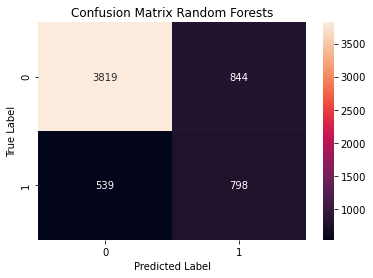

In [212]:
rfc = RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=5,random_state=10)
rfc.fit(ds_xtrain,ds_ytrain)
y_predict = rfc.predict(mms_xtest)
probab = rfc.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Random Forests')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4663
           1       0.52      0.54      0.53      1337

    accuracy                           0.79      6000
   macro avg       0.69      0.70      0.70      6000
weighted avg       0.79      0.79      0.79      6000

Log Loss: 0.5415107644944377


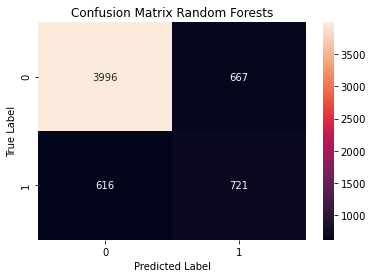

In [213]:
rfc = RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=5,random_state=10)
rfc.fit(us_xtrain,us_ytrain)
y_predict = rfc.predict(mms_xtest)
probab = rfc.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Random Forests')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4663
           1       0.50      0.52      0.51      1337

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.78      0.78      6000

Log Loss: 0.5236074362604702


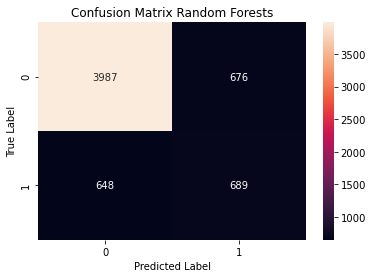

In [214]:
rfc = RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=5,random_state=10)
rfc.fit(smote_xtrain,smote_ytrain)
y_predict = rfc.predict(mms_xtest)
probab = rfc.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Random Forests')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72      4663
           1       0.30      0.55      0.39      1337

    accuracy                           0.62      6000
   macro avg       0.57      0.59      0.55      6000
weighted avg       0.71      0.62      0.65      6000

Log Loss: 0.774185115373882


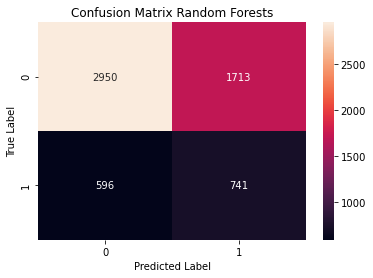

In [215]:
rfc = RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=5,random_state=10)
rfc.fit(nm_xtrain,nm_ytrain)
y_predict = rfc.predict(mms_xtest)
probab = rfc.predict_proba(mms_xtest)
cfmatrix(y_test,y_predict,'Confusion Matrix Random Forests')
print(metrics.classification_report(y_test,y_predict))
print('Log Loss:',metrics.log_loss(y_test,probab))

All of our new models performed better than the orignal model. Therefore one inference that can be made is that RFC model is highly affected due to imbalanced dataset. This is due to the fact that DTC/RFC algorithms tend to reduce the error and equal importance to the minority class isn't given.

In [216]:
new_row = pd.Series(data={'F1':0.54,'Recall':0.60},name='RFC_DS')
Metrics = Metrics.append(new_row, ignore_index=False)
new_row = pd.Series(data={'F1':0.53,'Recall':0.54},name='RFC_US')
Metrics = Metrics.append(new_row, ignore_index=False)
new_row = pd.Series(data={'F1':0.39,'Recall':0.55},name='RFC_NM')
Metrics = Metrics.append(new_row, ignore_index=False)


Since the down sampled data and SMOTE data have been producing good results, let's check it with one last model. Let's make use of the dataset with the k nearest neighbours model. Hoping for a new surprise!!

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4663
           1       0.37      0.64      0.47      1337

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000



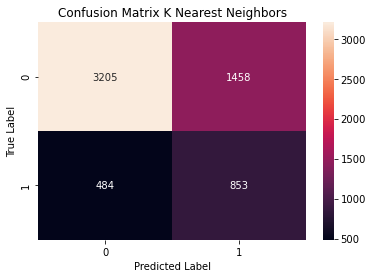

In [217]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(ds_xtrain,ds_ytrain)
y_predict = knn.predict(mms_xtest)
from sklearn.metrics import confusion_matrix
cfmatrix(y_test,y_predict,'Confusion Matrix K Nearest Neighbors')
print(metrics.classification_report(y_test,y_predict))

Brilliant!! We have again obtained our highest recall score. This is amazing the down sampled data has performed very well on various models.

In [218]:
new_row = pd.Series(data={'F1':0.47,'Recall':0.64},name='KNN_DS')
Metrics = Metrics.append(new_row, ignore_index=False)

# Conclusion

In [219]:
Metrics.sort_values(by=['Recall','F1'],ascending=False)

,F1,Recall
KNN_DS,0.47,0.64
DTC_DS,0.50,0.63
RFC_DS,0.54,0.60
RFC_NM,0.39,0.55
RFC_US,0.53,0.54
GNB-SMT,0.51,0.53
GNB-DS,0.51,0.53
DTC_US,0.52,0.52
SVM_US,0.51,0.51
SVM_OS,0.51,0.51


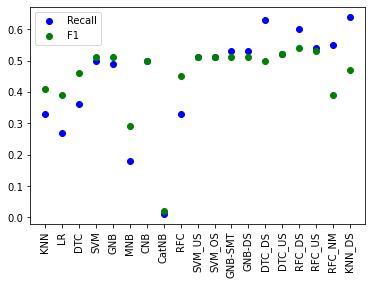

In [220]:
plt.scatter(Metrics.index,Metrics['Recall'],color='b')
plt.scatter(Metrics.index,Metrics['F1'],color='g')
plt.xticks(rotation= 90)
plt.legend(('Recall','F1'))
plt.show()

The various resampling techniques defintely helped us to refine our models.

I hope this kernel helped you guys to gain a bit of knowledge on various classification models, metrics used for evaluation of models and most importantly how to tackle imbalanced datasets with the help of resampling.